# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,551,79,39,72,127,53,9,142,48,19,135,165,295,144,77,7,21,181,189
1,782,87,44,98,211,70,10,189,35,22,141,214,535,178,71,2,21,187,194
2,79,89,44,68,113,50,7,150,45,19,147,171,328,189,88,6,5,179,182
3,638,97,49,76,203,73,7,178,36,21,157,194,487,186,72,0,7,197,200
4,22,94,43,64,173,69,7,150,43,19,142,169,344,177,68,9,1,199,206
5,562,113,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
6,231,85,33,40,115,57,3,112,61,17,119,130,184,127,86,12,21,181,183
7,709,95,42,96,197,65,9,178,37,21,141,199,474,149,67,1,29,193,200
8,75,101,53,103,203,63,9,195,34,22,162,210,571,210,68,5,5,191,198
9,261,91,39,88,189,63,9,175,38,21,132,197,457,156,69,0,23,191,198


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000
mean,427.276867,93.830601,44.978142,82.222222,169.007286,61.564663,8.575592,169.661202,40.766849,20.648452,148.240437,189.438980,444.408015,175.595628,72.70674,6.275046,12.577413,188.821494,195.542805
std,245.474469,8.178132,6.269166,16.054702,34.235178,8.085419,4.555840,33.638942,7.844538,2.628851,14.631749,32.112746,179.295889,33.281432,7.68207,4.870488,8.894963,6.250329,7.557836
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,59.00000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,88.000000,40.000000,70.000000,140.000000,56.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,149.000000,68.00000,2.000000,5.000000,184.000000,190.000000
50%,429.000000,93.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,173.000000,72.00000,5.000000,11.000000,188.000000,196.000000
75%,643.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,600.000000,200.000000,76.00000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.00000,22.000000,41.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [31]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [133]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', 
                        max_iter=500, tol=1e-3)

params = {'penalty': ['l2'], 'C': uniform(loc=0, scale=5)}

def get_params(X_train, y_train, method=RandomizedSearchCV(estimator=lr, param_distributions=params)):
    method.fit(X_train, y_train)
    return method.best_params_['C'], method.best_params_['penalty']

In [134]:
C, penalty = get_params(X_train, y_train)
print(C, penalty)

lr_best = LogisticRegression(penalty=penalty, C=C, solver='saga', multi_class='multinomial', 
                        max_iter=500, tol=1e-3)

2.7273664481150734 l2


In [135]:
lr_best.fit(X_train, y_train)

LogisticRegression(C=2.7273664481150734, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)

In [182]:
from sklearn.metrics import roc_curve, accuracy_score, f1_score

# let compute weighted f1-score so we have some classes with different sizes
def score(y_fact, y_pred):
    accuracy = accuracy_score(y_fact, y_pred)
    f1 = f1_score(y_fact, y_pred, average='weighted')
    print('Accuracy = {};  f1 = {}'.format(accuracy, f1))
    return accuracy, f1

score(y_test, lr_best.predict(X_test))

Accuracy = 0.7205387205387206;  f1 = 0.7063003969712014


(0.7205387205387206, 0.7063003969712014)

In [121]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! conda install scikit-plot

^C

CondaError: KeyboardInterrupt



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

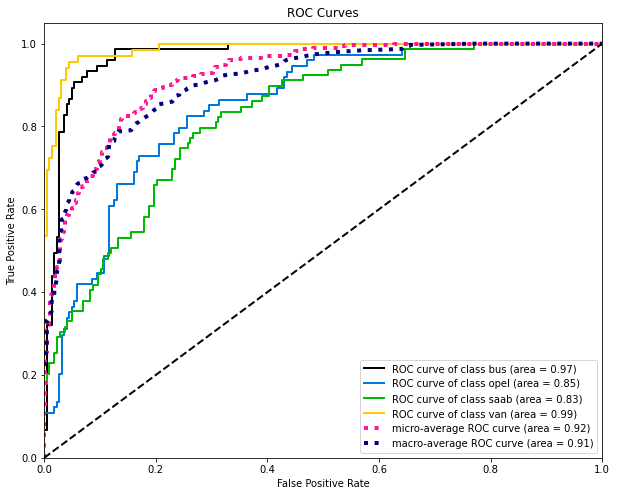

In [122]:
# let make a roc curve

from scikitplot.metrics import plot_roc

plot_roc(y_test, lr_best.predict_proba(X_test), figsize = (10, 8))

The Roc curve present good result, but we haven't scalled data. Let do it and check again.

In [123]:
from sklearn.preprocessing import StandardScaler

def scaled(X):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler.transform(X)

X_train_scaled = scaled(X_train)
X_test_scaled = scaled(X_test)

1.675769014282984 l2
Accuracy = 0.7946127946127947;  f1 = 0.7890798462387042


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

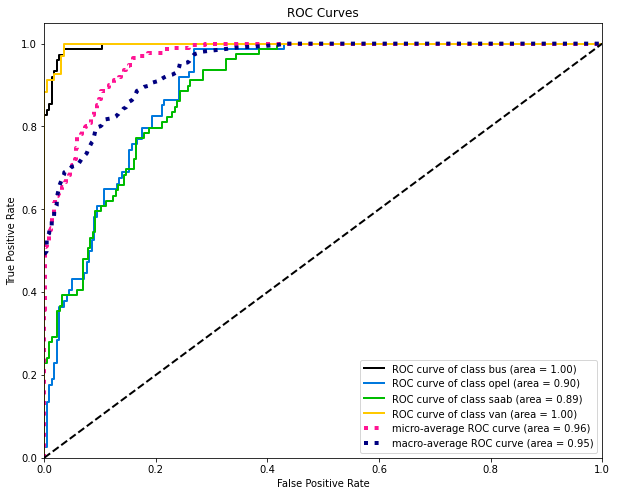

In [165]:
C, penalty = get_params(X_train, y_train)
print(C, penalty)

lr_best_scaled = LogisticRegression(penalty=penalty, C=C, solver='saga', multi_class='multinomial', 
                        max_iter=500, tol=1e-3)

lr_best_scaled.fit(X_train_scaled, y_train)
score(y_test, lr_best_scaled.predict(X_test_scaled))

plot_roc(y_test, lr_best_scaled.predict_proba(X_test_scaled), figsize = (10, 8))

We improved accuracy and f1-score from 0.7 to ~0.8! Roc curve became better too.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [166]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled) # будем использовать нормализованные данные!

expvar_ratio = pca.explained_variance_ratio_ # выборочная дисперсия компонент

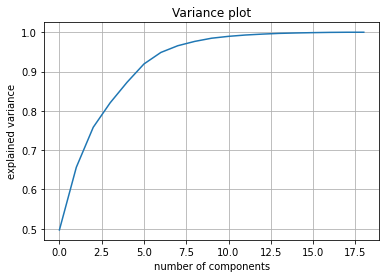

In [167]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(expvar_ratio)), np.cumsum(expvar_ratio))

plt.title('Variance plot')
plt.ylabel('explained variance')
plt.xlabel('number of components')
plt.grid()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [128]:
print(np.cumsum(expvar_ratio)[6])

0.9485973182348498


We choosen 8 components because it led exp var to $\simeq 0.95$. It is good because we decreased value of components by half.

In [129]:
### YOUR CODE HERE
n_components = 8

pca_model_n = PCA(n_components=n_components)
X_train_scaled_pca = pca_model_n.fit_transform(X_train_scaled)
X_test_scaled_pca = pca_model_n.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [139]:
### YOUR CODE HERE
C, penalty = get_params(X_train_scaled_pca, y_train)
C, penalty

(1.252775889593224, 'l2')

Accuracy = 0.6531986531986532;  f1 = 0.6316092868311541


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

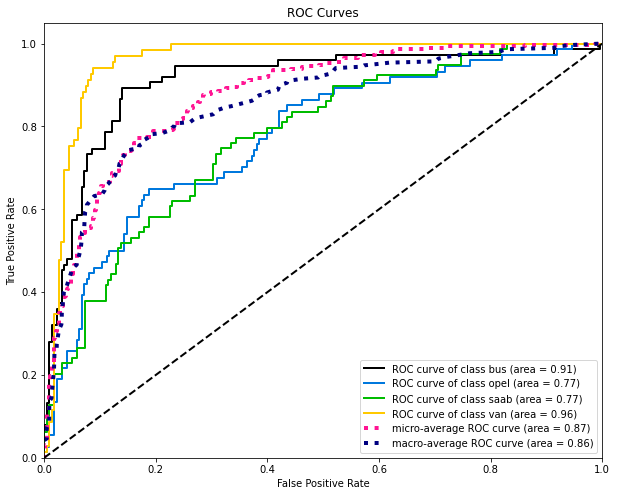

In [153]:
lr_best2 = LogisticRegression(penalty=penalty, C=C, solver='saga', multi_class='multinomial')
lr_best2.fit(X_train_scaled_pca, y_train)
y_pred = lr_best2.predict(X_test_scaled_pca)
    
score(y_test, y_pred)
plot_roc(y_test, lr_best2.predict_proba(X_test_scaled_pca), figsize = (10, 8))

Accuracy and f1 decreased. Roc curve became worse. But it works.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [151]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 20)}
grid_cv_tree = GridSearchCV(estimator=model, param_grid=params, 
                    scoring='precision_macro')
grid_cv_tree.fit(X_train, y_train)

print(grid_cv_tree.best_params_)
depth = grid_cv_tree.best_params_['max_depth']

{'max_depth': 13}


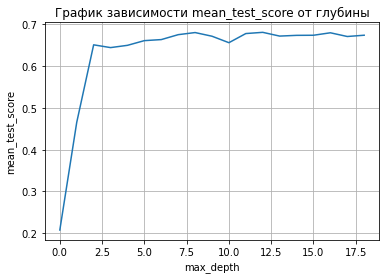

In [164]:
plt.plot(grid_cv_tree.cv_results_['mean_test_score'])
plt.xlabel("max_depth")
plt.ylabel('mean_test_score')
plt.title('График зависимости mean_test_score от глубины')
plt.grid()

Accuracy = 0.7070707070707071;  f1 = 0.7023598495459967


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

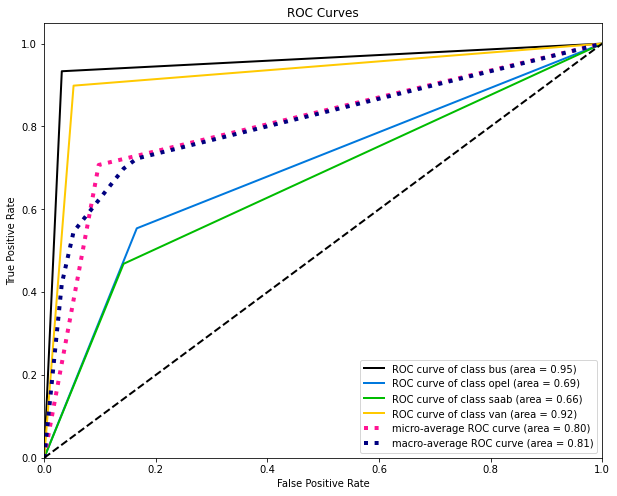

In [168]:
tree_best = DecisionTreeClassifier(max_depth=depth)
tree_best.fit(X_train, y_train)

y_pred = tree_best.predict(X_test)
    
score(y_test, y_pred)
plot_roc(y_test, tree_best.predict_proba(X_test), figsize = (10, 8))

Видно, что у линий мало изломов, значит, играет роль лишь небольшая глубина дерева. Это видно и по графику зависимости mean_test_score от глубины (он выше).

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [189]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# ensemble constructed from logistic regressions fitted on bootstraped samples
bc = BaggingClassifier(base_estimator=lr_best_scaled, bootstrap=True)

max_estimators = 50

params = {
    'n_estimators': np.arange(2, max_estimators, 2)
}

grid_cv_bagging = GridSearchCV(estimator=bc, 
                    param_grid=params)
grid_cv_bagging.fit(X_train_scaled, y_train)

print(grid_cv_bagging.best_params_)
best_n_estimators = grid_cv_bagging.best_params_['n_estimators']

{'n_estimators': 12}


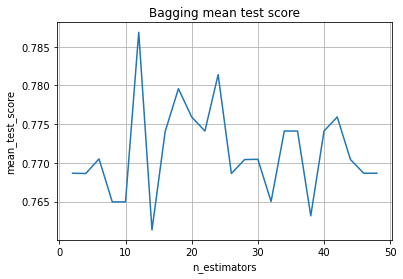

In [193]:
plt.plot(params['n_estimators'], grid_cv_bagging.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Bagging mean test score")
plt.grid()
plt.show()

In [191]:
def process_n_estimators_bagging(n):    
    bagging_best = BaggingClassifier(base_estimator=lr_best_scaled, n_estimators = n)
    bagging_best.fit(X_train_scaled, y_train)
    y_pred = bagging_best.predict(X_test_scaled)

    return score(y_test, y_pred)

accuracy = []
f1 = []
for i in range(1, max_estimators):
    score_i = process_n_estimators_bagging(i)
    accuracy += [score_i[0]]
    f1 += [score_i[1]]

Accuracy = 0.7508417508417509;  f1 = 0.7433383019499653
Accuracy = 0.7744107744107744;  f1 = 0.7678002748251062
Accuracy = 0.7912457912457912;  f1 = 0.785746320378355
Accuracy = 0.7777777777777778;  f1 = 0.7711501803909778
Accuracy = 0.7912457912457912;  f1 = 0.7864550186824161
Accuracy = 0.7845117845117845;  f1 = 0.7784828768769012
Accuracy = 0.7811447811447811;  f1 = 0.7751070363740287
Accuracy = 0.7777777777777778;  f1 = 0.7712262427522826
Accuracy = 0.7946127946127947;  f1 = 0.7893362243623476
Accuracy = 0.7878787878787878;  f1 = 0.7820875130387916
Accuracy = 0.7912457912457912;  f1 = 0.7856851649752853
Accuracy = 0.7878787878787878;  f1 = 0.7820467188398296
Accuracy = 0.8047138047138047;  f1 = 0.8003133379968885
Accuracy = 0.7845117845117845;  f1 = 0.7785879183733206
Accuracy = 0.7878787878787878;  f1 = 0.7820962253845903
Accuracy = 0.7878787878787878;  f1 = 0.7827689103510873
Accuracy = 0.7946127946127947;  f1 = 0.7885118156600099
Accuracy = 0.797979797979798;  f1 = 0.79298231189

Text(0.5, 1.0, 'Bagging score')

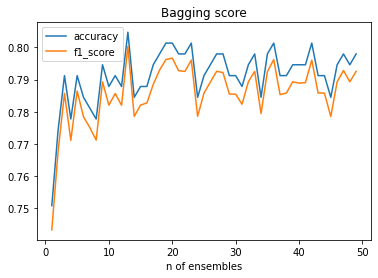

In [192]:
plt.plot(np.arange(1, max_estimators), accuracy, label='accuracy')
plt.plot(np.arange(1, max_estimators), f1, label='f1_score')
plt.legend()
plt.xlabel('n of ensembles')
plt.title('Bagging score')

We have good results strarts with n_of_ensembles = 12. It doesn't predict better with higher number of estimators.

In [218]:
bagging_best = BaggingClassifier(base_estimator=lr_best_scaled, n_estimators=12)
bagging_best.fit(X_train_scaled, y_train)
y_pred = bagging_best.predict(X_test_scaled)

score(y_test, y_pred)

Accuracy = 0.7777777777777778;  f1 = 0.7723031049718981


(0.7777777777777778, 0.7723031049718981)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [198]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

rfc = RandomForestClassifier()
params = {
    'n_estimators': np.arange(2, 50, 2)
}

grid_cv_random_forest = GridSearchCV(estimator=rfc, 
                    param_grid=params)

grid_cv_random_forest.fit(X_train_scaled, y_train)

print(grid_cv_random_forest.best_params_)
best_n_estimators_r = grid_cv_random_forest.best_params_['n_estimators']

{'n_estimators': 30}


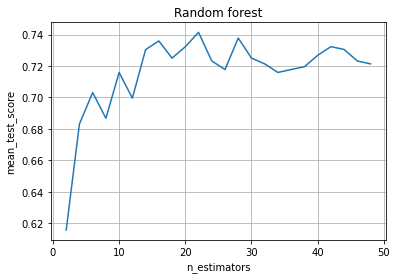

In [197]:
plt.plot(params['n_estimators'], grid_cv_random_forest.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Random forest")
plt.grid()

In [201]:
def process_n_estimators_random_forest(n):    
    random_forest_best = RandomForestClassifier(n_estimators=n)
    random_forest_best.fit(X_train_scaled, y_train)
    y_pred = random_forest_best.predict(X_test_scaled)

    return score(y_test, y_pred)

accuracy = []
f1 = []
for i in range(1, max_estimators):
    score_i = process_n_estimators_random_forest(i)
    accuracy += [score_i[0]]
    f1 += [score_i[1]]

Accuracy = 0.6262626262626263;  f1 = 0.6246260776800698
Accuracy = 0.6026936026936027;  f1 = 0.5929351925021437
Accuracy = 0.6531986531986532;  f1 = 0.6399879367159866
Accuracy = 0.6767676767676768;  f1 = 0.668911088125491
Accuracy = 0.7003367003367004;  f1 = 0.6866718306361531
Accuracy = 0.696969696969697;  f1 = 0.6863570726805415
Accuracy = 0.7104377104377104;  f1 = 0.699222186172398
Accuracy = 0.7239057239057239;  f1 = 0.7111762571758012
Accuracy = 0.7171717171717171;  f1 = 0.702739575928431
Accuracy = 0.7306397306397306;  f1 = 0.7227999522906386
Accuracy = 0.7070707070707071;  f1 = 0.6972645095938106
Accuracy = 0.7205387205387206;  f1 = 0.7087107162784009
Accuracy = 0.7205387205387206;  f1 = 0.7076962970565572
Accuracy = 0.734006734006734;  f1 = 0.7180859876767223
Accuracy = 0.7306397306397306;  f1 = 0.7198850632292191
Accuracy = 0.7542087542087542;  f1 = 0.7407516717138638
Accuracy = 0.7070707070707071;  f1 = 0.6946788385142969
Accuracy = 0.7239057239057239;  f1 = 0.71151902541267

Text(0.5, 1.0, 'Random forest score')

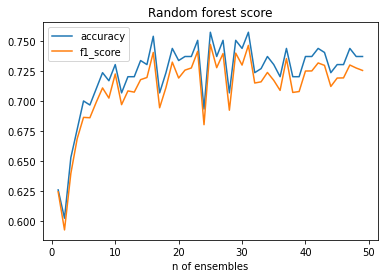

In [203]:
plt.plot(np.arange(1, max_estimators), accuracy, label='accuracy')
plt.plot(np.arange(1, max_estimators), f1, label='f1_score')
plt.legend()
plt.xlabel('n of ensembles')
plt.title('Random forest score')

It works stable good with n_of_estimators $>= 15%$.

In [232]:
forest_best = RandomForestClassifier(n_estimators=15)
forest_best.fit(X_train_scaled, y_train)
y_pred = forest_best.predict(X_test_scaled)

score(y_test, y_pred)

Accuracy = 0.7710437710437711;  f1 = 0.7603839390162087


(0.7710437710437711, 0.7603839390162087)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [240]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold

def plt_method_score(X_train, X_test, y_train, y_test, models, names, colors):
    n_splits = 10
    cross_validation = StratifiedKFold(n_splits=n_splits)

    plt.figure(figsize=(15,10))

    for model, name, color in zip(models, names, colors):

        accuracy = []
        f1 = []
        whole_train_indices = []
        for train_indices, test_indices in cross_validation.split(X_train, y_train):
            whole_train_indices.extend(train_indices)
            
            model.fit(X_train[whole_train_indices], y_train[whole_train_indices])
            y_pred = model.predict(X_test)
            
            accuracy += [accuracy_score(y_test, y_pred)]
            f1 += [f1_score(y_test, y_pred, average='macro')]
        
        plt.plot(np.arange(n_splits) / n_splits, accuracy, ':', color=color, label='{} accuracy'.format(name))
        plt.plot(np.arange(n_splits) / n_splits, f1, color=color, label='{} f1'.format(name))

    plt.xlabel('Доля исходного датасета, участвующая в обучающей выборке')
    plt.ylabel('score')    
    plt.legend()
    plt.grid()
    plt.title('Сравнение моделей')
    plt.show()

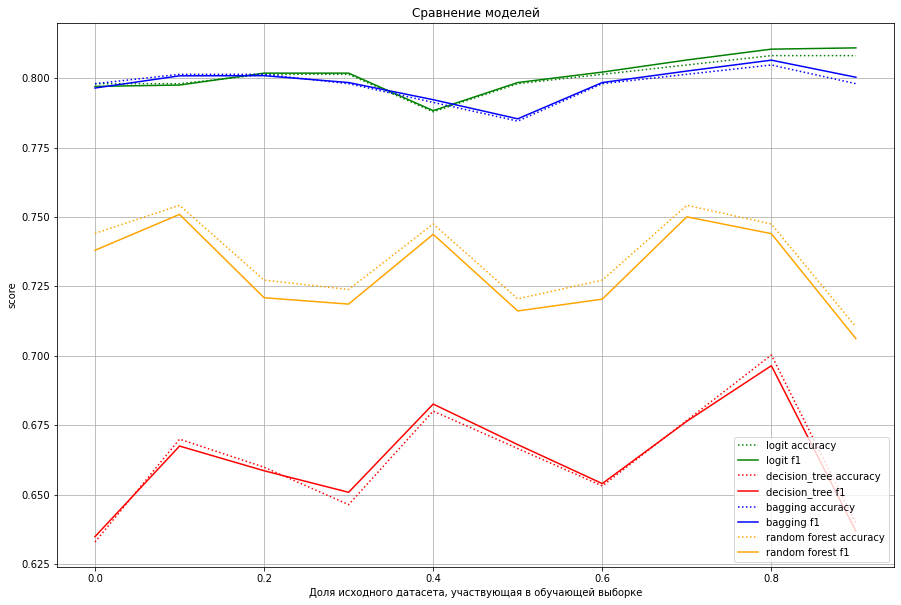

In [241]:
colors = ['g', 'r', 'b', 'orange']
names = ['logit', 'decision_tree', 'bagging', 'random forest']
models = [lr_best_scaled, tree_best, bagging_best, forest_best]

plt_method_score(X_train_scaled, X_test_scaled, y_train, y_test, models, names, colors)

**Вывод:** Логистическая регрессия и бэггинг на логистической регрессии показывают наилучшие результаты. Случайный лес и дерево решений -- хуже.

## P.S
Да, я делал сначала выводы на английском, потом на русском, а потом снова на английском, и так далее, потому что так было проще. Комменты тоже были на двух языках